In [552]:
pip install plotly==5.4.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [553]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

df = pd.read_csv('./T0_without_nan_columns.csv', error_bad_lines=False, sep=',')
df = df.drop(df.columns[[0,4]], axis = 1)
df

,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,Gymles,...,6. Roll ball,7. Running jump,8. Kicking Ball,9. Voorw. Jump,10. Baseball Bat,11. Zijw. Gallop,12. Bouncing ball,MQ,MQ category,BMI category
0,101101,0.0,1,4.55,31.2,111.5,19.8,1.120,15.930000,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,4.0,100.481,3.0,1.0
1,101102,1.0,1,5.01,NaN,112.5,17.3,1.130,13.670000,5.0,...,4.0,2.0,4.0,4.0,1.0,4.0,1.0,NaN,NaN,1.0
2,101104,0.0,1,5.28,NaN,110.9,21.0,1.110,17.070000,5.0,...,4.0,3.0,1.0,4.0,1.0,1.0,4.0,NaN,NaN,1.0
3,101105,0.0,1,5.79,NaN,105.7,18.2,1.060,16.290000,NaN,...,3.0,3.0,4.0,4.0,3.0,1.0,1.0,NaN,NaN,1.0
4,101106,1.0,1,4.73,NaN,116.0,22.4,1.160,16.650000,NaN,...,4.0,3.0,4.0,4.0,3.0,4.0,2.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,310109,0.0,1,6.29,21.3,120.0,21.8,1.200,15.138889,5.0,...,2.0,4.0,4.0,3.0,4.0,4.0,3.0,101.408,3.0,1.0
1693,310110,1.0,1,4.37,28.2,108.0,16.5,1.080,14.146091,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,112.411,3.0,1.0
1694,310111,1.0,1,4.31,25.7,103.2,18.4,1.032,17.276606,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,123.346,5.0,NaN
1695,310112,0.0,1,6.27,24.3,126.5,30.4,1.265,18.997329,5.0,...,4.0,4.0,4.0,3.0,1.0,1.0,1.0,88.889,3.0,2.0


In [554]:
dft = pd.read_csv('./MQT1.csv', error_bad_lines=False, sep=',')
dft

,Respondentnummer,MQT1_category
0,303110,3
1,303110,2
2,302121,3
3,302121,3
4,302128,4
...,...,...
1204,306106,1
1205,306135,5
1206,220268,4
1207,207117,5


In [555]:
df = df.merge(dft, on='Respondentnummer', how='outer')

In [556]:
dfq = pd.read_csv('./zipcode_numbers.csv', error_bad_lines=False, sep=',')
dfq

,Respondentnummer,zipcode_numbers,zipcode_letters,date_of_birth_child,language_development,aantal_dagen_wandelen_fietsen,opstaan_doordeweeks,naar_bed_doordeweeks,onder_begeleiding_spelen,belonen_wanneer_rustig,...,bezeren_actief_spelen,zelf_spelen_limiet,corrigeren_tedruk,binnenhouden_ongeactweer,leren_bewegen_gezondheid,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen
0,201102,3191.0,0.642643,0.954338,0.2,0.857143,0.200000,0.290323,1.000,0.285714,...,1.0,0.555556,0.071429,0.083333,1.0,0.555556,0.4,0.222222,0.4,0.4
1,201108,3086.0,0.480480,0.592085,0.6,0.142857,0.533333,0.451613,0.125,0.571429,...,0.6,0.555556,0.142857,0.166667,1.0,0.333333,0.4,0.111111,0.2,0.4
2,201110,3191.0,0.195195,0.327245,0.6,0.428571,0.533333,0.612903,1.000,0.571429,...,0.8,0.555556,0.214286,0.083333,0.8,0.555556,0.6,0.222222,0.2,0.6
3,201113,3192.0,0.021021,0.604262,0.6,0.142857,0.200000,0.516129,0.250,0.285714,...,0.4,0.333333,0.071429,0.083333,0.8,0.444444,0.6,0.111111,0.2,0.6
4,201114,3191.0,0.357357,0.385084,0.6,0.428571,0.333333,0.451613,0.625,0.714286,...,1.0,0.555556,0.285714,0.166667,0.8,0.555556,0.6,0.222222,0.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,311129,9736.0,0.795796,0.627093,0.6,0.571429,0.533333,0.451613,0.125,0.142857,...,0.6,0.555556,0.214286,0.083333,0.8,0.555556,0.6,0.222222,0.2,0.6
1098,311130,9736.0,0.150150,0.598174,0.6,0.571429,0.633333,0.612903,0.625,0.428571,...,0.6,0.555556,0.214286,0.166667,1.0,0.555556,0.6,0.111111,0.2,0.8
1099,311131,9736.0,0.672673,0.923896,0.6,0.142857,0.533333,0.741935,0.125,0.142857,...,1.0,0.555556,0.357143,0.166667,0.6,0.555556,0.6,0.111111,0.2,0.8
1100,311132,9736.0,0.099099,0.420091,0.6,0.428571,0.533333,0.451613,1.000,0.285714,...,0.6,0.555556,0.214286,0.083333,1.0,0.555556,0.6,0.333333,0.2,0.6


In [557]:
dfq = dfq.dropna()
dfq['zipcode_numbers'] = dfq['zipcode_numbers'].astype(int)
dfq

/tmp/ipykernel_17829/1362929835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['zipcode_numbers'] = dfq['zipcode_numbers'].astype(int)


,Respondentnummer,zipcode_numbers,zipcode_letters,date_of_birth_child,language_development,aantal_dagen_wandelen_fietsen,opstaan_doordeweeks,naar_bed_doordeweeks,onder_begeleiding_spelen,belonen_wanneer_rustig,...,bezeren_actief_spelen,zelf_spelen_limiet,corrigeren_tedruk,binnenhouden_ongeactweer,leren_bewegen_gezondheid,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen
0,201102,3191,0.642643,0.954338,0.2,0.857143,0.200000,0.290323,1.000,0.285714,...,1.0,0.555556,0.071429,0.083333,1.0,0.555556,0.4,0.222222,0.4,0.4
1,201108,3086,0.480480,0.592085,0.6,0.142857,0.533333,0.451613,0.125,0.571429,...,0.6,0.555556,0.142857,0.166667,1.0,0.333333,0.4,0.111111,0.2,0.4
2,201110,3191,0.195195,0.327245,0.6,0.428571,0.533333,0.612903,1.000,0.571429,...,0.8,0.555556,0.214286,0.083333,0.8,0.555556,0.6,0.222222,0.2,0.6
3,201113,3192,0.021021,0.604262,0.6,0.142857,0.200000,0.516129,0.250,0.285714,...,0.4,0.333333,0.071429,0.083333,0.8,0.444444,0.6,0.111111,0.2,0.6
4,201114,3191,0.357357,0.385084,0.6,0.428571,0.333333,0.451613,0.625,0.714286,...,1.0,0.555556,0.285714,0.166667,0.8,0.555556,0.6,0.222222,0.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,311129,9736,0.795796,0.627093,0.6,0.571429,0.533333,0.451613,0.125,0.142857,...,0.6,0.555556,0.214286,0.083333,0.8,0.555556,0.6,0.222222,0.2,0.6
1098,311130,9736,0.150150,0.598174,0.6,0.571429,0.633333,0.612903,0.625,0.428571,...,0.6,0.555556,0.214286,0.166667,1.0,0.555556,0.6,0.111111,0.2,0.8
1099,311131,9736,0.672673,0.923896,0.6,0.142857,0.533333,0.741935,0.125,0.142857,...,1.0,0.555556,0.357143,0.166667,0.6,0.555556,0.6,0.111111,0.2,0.8
1100,311132,9736,0.099099,0.420091,0.6,0.428571,0.533333,0.451613,1.000,0.285714,...,0.6,0.555556,0.214286,0.083333,1.0,0.555556,0.6,0.333333,0.2,0.6


In [558]:
df = df.merge(dfq, on='Respondentnummer', how='outer')
df

,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,Gymles,...,bezeren_actief_spelen,zelf_spelen_limiet,corrigeren_tedruk,binnenhouden_ongeactweer,leren_bewegen_gezondheid,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen
0,101101,0.0,1.0,4.55,31.2,111.5,19.8,1.12,15.93,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101102,1.0,1.0,5.01,NaN,112.5,17.3,1.13,13.67,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101104,0.0,1.0,5.28,NaN,110.9,21.0,1.11,17.07,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101105,0.0,1.0,5.79,NaN,105.7,18.2,1.06,16.29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101106,1.0,1.0,4.73,NaN,116.0,22.4,1.16,16.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,311129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,0.555556,0.214286,0.083333,0.8,0.555556,0.6,0.222222,0.2,0.6
2284,311130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,0.555556,0.214286,0.166667,1.0,0.555556,0.6,0.111111,0.2,0.8
2285,311131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.555556,0.357143,0.166667,0.6,0.555556,0.6,0.111111,0.2,0.8
2286,311132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,0.555556,0.214286,0.083333,1.0,0.555556,0.6,0.333333,0.2,0.6


In [559]:
dfm = pd.read_csv('./Migration.csv', error_bad_lines=False, sep=',')
dfm

,zipcode_numbers,"(voormalige) Nederlandse Antillen, Aruba",Afrika,Amerika,Azië,België,Duitsland,Europa (excl. Nederlandse achtergrond),Europese Unie (excl. Nederlandse acht...,Indonesië,...,Nederlandse achtergrond,Niet-westerse migratieachtergrond,Oceanië,Overige niet-westerse migratieachterg...,Overige westerse migratieachtergrond,Polen,Suriname,Totaal,Turkije,Westerse migratieachtergrond
0,1011,44.166667,178.333333,586.666667,652.500000,70.000000,226.666667,1.379167e+03,906.666667,240.833333,...,3.600833e+03,1.016667e+03,49.166667,666.666667,1246.666667,44.166667,171.666667,6.445000e+03,70.000000,1.828333e+03
1,1012,47.500000,192.500000,586.666667,542.500000,54.166667,184.166667,1.679167e+03,1173.333333,154.166667,...,2.660833e+03,1.020833e+03,53.333333,745.000000,1580.000000,59.166667,115.833333,5.714167e+03,69.166667,2.031667e+03
2,1013,151.666667,1258.333333,1660.833333,1215.000000,121.666667,390.833333,2.524167e+03,1630.000000,465.833333,...,7.469167e+03,3.562500e+03,90.000000,1631.666667,2134.166667,72.500000,805.833333,1.421750e+04,240.833333,3.185000e+03
3,1014,11.666667,47.500000,137.500000,119.166667,20.000000,50.000000,2.808333e+02,194.166667,50.833333,...,1.086667e+03,2.291667e+02,9.166667,139.166667,227.500000,16.666667,35.833333,1.681667e+03,16.666667,3.650000e+02
4,1015,71.666667,342.500000,930.833333,789.166667,80.833333,305.833333,2.065000e+03,1344.166667,331.666667,...,5.677500e+03,1.369167e+03,97.500000,843.333333,2078.333333,60.000000,213.333333,9.903333e+03,100.000000,2.856667e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,9997,0.000000,0.000000,1.666667,5.000000,0.000000,8.333333,9.166667e+00,8.333333,3.333333,...,3.916667e+02,0.000000e+00,0.000000,0.000000,2.500000,0.833333,0.000000,4.066667e+02,0.000000,1.500000e+01
4058,9998,0.000000,0.000000,3.333333,0.833333,0.000000,0.833333,7.500000e+00,1.666667,1.666667,...,1.125000e+02,4.166667e+00,0.000000,0.000000,6.666667,0.000000,4.166667,1.225000e+02,0.000000,9.166667e+00
4059,9999,0.000000,0.000000,0.000000,1.666667,0.000000,3.333333,5.000000e+00,5.000000,2.500000,...,5.833333e+01,0.000000e+00,0.000000,0.000000,0.833333,0.000000,0.000000,6.583333e+01,0.000000,6.666667e+00
4060,1,112559.333333,482058.666667,484334.000000,651985.666667,81072.000000,231676.666667,1.207515e+06,734645.666667,236098.333333,...,8.785462e+06,1.613079e+06,16310.666667,708316.000000,544510.666667,135767.333333,238222.666667,1.162767e+07,279631.333333,1.229125e+06


In [560]:
dfm['zipcode_numbers'] = dfm['zipcode_numbers'].astype(int)
dfm

,zipcode_numbers,"(voormalige) Nederlandse Antillen, Aruba",Afrika,Amerika,Azië,België,Duitsland,Europa (excl. Nederlandse achtergrond),Europese Unie (excl. Nederlandse acht...,Indonesië,...,Nederlandse achtergrond,Niet-westerse migratieachtergrond,Oceanië,Overige niet-westerse migratieachterg...,Overige westerse migratieachtergrond,Polen,Suriname,Totaal,Turkije,Westerse migratieachtergrond
0,1011,44.166667,178.333333,586.666667,652.500000,70.000000,226.666667,1.379167e+03,906.666667,240.833333,...,3.600833e+03,1.016667e+03,49.166667,666.666667,1246.666667,44.166667,171.666667,6.445000e+03,70.000000,1.828333e+03
1,1012,47.500000,192.500000,586.666667,542.500000,54.166667,184.166667,1.679167e+03,1173.333333,154.166667,...,2.660833e+03,1.020833e+03,53.333333,745.000000,1580.000000,59.166667,115.833333,5.714167e+03,69.166667,2.031667e+03
2,1013,151.666667,1258.333333,1660.833333,1215.000000,121.666667,390.833333,2.524167e+03,1630.000000,465.833333,...,7.469167e+03,3.562500e+03,90.000000,1631.666667,2134.166667,72.500000,805.833333,1.421750e+04,240.833333,3.185000e+03
3,1014,11.666667,47.500000,137.500000,119.166667,20.000000,50.000000,2.808333e+02,194.166667,50.833333,...,1.086667e+03,2.291667e+02,9.166667,139.166667,227.500000,16.666667,35.833333,1.681667e+03,16.666667,3.650000e+02
4,1015,71.666667,342.500000,930.833333,789.166667,80.833333,305.833333,2.065000e+03,1344.166667,331.666667,...,5.677500e+03,1.369167e+03,97.500000,843.333333,2078.333333,60.000000,213.333333,9.903333e+03,100.000000,2.856667e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,9997,0.000000,0.000000,1.666667,5.000000,0.000000,8.333333,9.166667e+00,8.333333,3.333333,...,3.916667e+02,0.000000e+00,0.000000,0.000000,2.500000,0.833333,0.000000,4.066667e+02,0.000000,1.500000e+01
4058,9998,0.000000,0.000000,3.333333,0.833333,0.000000,0.833333,7.500000e+00,1.666667,1.666667,...,1.125000e+02,4.166667e+00,0.000000,0.000000,6.666667,0.000000,4.166667,1.225000e+02,0.000000,9.166667e+00
4059,9999,0.000000,0.000000,0.000000,1.666667,0.000000,3.333333,5.000000e+00,5.000000,2.500000,...,5.833333e+01,0.000000e+00,0.000000,0.000000,0.833333,0.000000,0.000000,6.583333e+01,0.000000,6.666667e+00
4060,1,112559.333333,482058.666667,484334.000000,651985.666667,81072.000000,231676.666667,1.207515e+06,734645.666667,236098.333333,...,8.785462e+06,1.613079e+06,16310.666667,708316.000000,544510.666667,135767.333333,238222.666667,1.162767e+07,279631.333333,1.229125e+06


In [561]:
df = df.merge(dfm, on='zipcode_numbers', how='outer')
df

,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,Gymles,...,Nederlandse achtergrond,Niet-westerse migratieachtergrond,Oceanië,Overige niet-westerse migratieachterg...,Overige westerse migratieachtergrond,Polen,Suriname,Totaal,Turkije,Westerse migratieachtergrond
0,101101.0,0.0,1.0,4.55,31.2,111.5,19.8,1.12,15.93,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101102.0,1.0,1.0,5.01,NaN,112.5,17.3,1.13,13.67,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101104.0,0.0,1.0,5.28,NaN,110.9,21.0,1.11,17.07,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101105.0,0.0,1.0,5.79,NaN,105.7,18.2,1.06,16.29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101106.0,1.0,1.0,4.73,NaN,116.0,22.4,1.16,16.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.916667e+02,0.000000e+00,0.000000,0.000000,2.500000,0.833333,0.000000,4.066667e+02,0.000000,1.500000e+01
6235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.125000e+02,4.166667e+00,0.000000,0.000000,6.666667,0.000000,4.166667,1.225000e+02,0.000000,9.166667e+00
6236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.833333e+01,0.000000e+00,0.000000,0.000000,0.833333,0.000000,0.000000,6.583333e+01,0.000000,6.666667e+00
6237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.785462e+06,1.613079e+06,16310.666667,708316.000000,544510.666667,135767.333333,238222.666667,1.162767e+07,279631.333333,1.229125e+06


In [562]:
dfi = pd.read_csv('./Income.csv', error_bad_lines=False, sep=',')
dfi

,zipcode_numbers,Aantal_huishoudens,Mediaan_besteedbaar_inkomen,first_20th_percentile,second_20th_percentile,third_20th_percentile,fourth_20th_percentile,fifth_20th_percentile
0,1011.0,6100,27500,30,15,12,13,27
1,1012.0,5700,24900,34,15,14,13,22
2,1013.0,12300,27200,31,16,14,14,23
3,1014.0,300,40700,18,7,13,17,43
4,1015.0,9400,27500,30,15,13,13,27
...,...,...,...,...,...,...,...,...
3546,9988.0,700,32500,19,22,26,18,12
3547,9989.0,1000,31300,20,25,22,18,13
3548,9991.0,1000,30400,26,24,19,18,10
3549,9995.0,300,33500,21,22,26,18,11


In [563]:
dfi['zipcode_numbers'] = dfi['zipcode_numbers'].astype(int)
dfi

,zipcode_numbers,Aantal_huishoudens,Mediaan_besteedbaar_inkomen,first_20th_percentile,second_20th_percentile,third_20th_percentile,fourth_20th_percentile,fifth_20th_percentile
0,1011,6100,27500,30,15,12,13,27
1,1012,5700,24900,34,15,14,13,22
2,1013,12300,27200,31,16,14,14,23
3,1014,300,40700,18,7,13,17,43
4,1015,9400,27500,30,15,13,13,27
...,...,...,...,...,...,...,...,...
3546,9988,700,32500,19,22,26,18,12
3547,9989,1000,31300,20,25,22,18,13
3548,9991,1000,30400,26,24,19,18,10
3549,9995,300,33500,21,22,26,18,11


In [ ]:
df = df.merge(dfi, on='zipcode_numbers', how='outer')
df

In [ ]:
dfs = pd.read_csv('./CBS_stats.csv', error_bad_lines=False, sep=',')
dfs

,zipcode_numbers,Totaal,Man,Vrouw,tot 15 jaar,15 tot 25 jaar,25 tot 45 jaar,45 tot 65 jaar,65 jaar en ouder,gedurende \n2019,...,Koopwoning,Huurwoning,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid
0,1011,9670,5020,4655,765,1095,3275,2835,1700,70,...,30,70,2465,685,471,870,1950,760,6995,1
1,1012,8420,4630,3785,445,1165,4370,1715,715,55,...,20,80,720,1115,428,980,2000,420,8458,1
2,1013,21335,10620,10715,2555,1835,7780,6090,3080,235,...,30,70,6020,875,410,780,1860,2485,6378,1
3,1014,1745,935,810,305,110,890,365,75,50,...,40,60,80,175,0,280,2130,145,2901,1
4,1015,14885,7590,7295,1280,1560,5300,4280,2465,125,...,30,70,3375,1200,472,960,1880,1230,11009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,9995,680,355,330,120,90,140,225,110,0,...,70,30,75,10,141,1700,2790,60,91,5
4064,9996,65,40,25,10,5,10,20,20,0,...,90,0,0,0,163,1790,2580,0,19,5
4065,9997,610,320,290,95,70,120,205,120,0,...,70,30,65,5,168,1790,3040,45,87,5
4066,9998,185,100,85,35,25,30,65,25,0,...,80,20,5,5,168,1940,2720,5,17,5


In [ ]:
dfs['zipcode_numbers'] = dfs['zipcode_numbers'].astype(int)
dfs

,zipcode_numbers,Totaal,Man,Vrouw,tot 15 jaar,15 tot 25 jaar,25 tot 45 jaar,45 tot 65 jaar,65 jaar en ouder,gedurende \n2019,...,Koopwoning,Huurwoning,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid
0,1011,9670,5020,4655,765,1095,3275,2835,1700,70,...,30,70,2465,685,471,870,1950,760,6995,1
1,1012,8420,4630,3785,445,1165,4370,1715,715,55,...,20,80,720,1115,428,980,2000,420,8458,1
2,1013,21335,10620,10715,2555,1835,7780,6090,3080,235,...,30,70,6020,875,410,780,1860,2485,6378,1
3,1014,1745,935,810,305,110,890,365,75,50,...,40,60,80,175,0,280,2130,145,2901,1
4,1015,14885,7590,7295,1280,1560,5300,4280,2465,125,...,30,70,3375,1200,472,960,1880,1230,11009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,9995,680,355,330,120,90,140,225,110,0,...,70,30,75,10,141,1700,2790,60,91,5
4064,9996,65,40,25,10,5,10,20,20,0,...,90,0,0,0,163,1790,2580,0,19,5
4065,9997,610,320,290,95,70,120,205,120,0,...,70,30,65,5,168,1790,3040,45,87,5
4066,9998,185,100,85,35,25,30,65,25,0,...,80,20,5,5,168,1940,2720,5,17,5


In [ ]:
df = df.merge(dfs, on='zipcode_numbers', how='outer')
df

,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,Gymles,...,Koopwoning,Huurwoning,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid
0,101101.0,0.0,1.0,4.55,31.2,111.5,19.8,1.12,15.93,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101102.0,1.0,1.0,5.01,NaN,112.5,17.3,1.13,13.67,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101104.0,0.0,1.0,5.28,NaN,110.9,21.0,1.11,17.07,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101105.0,0.0,1.0,5.79,NaN,105.7,18.2,1.06,16.29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101106.0,1.0,1.0,4.73,NaN,116.0,22.4,1.16,16.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,5.0
6244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616.0,4.0


In [ ]:
merged_data = df

In [ ]:
df = merged_data.dropna()

In [ ]:
df['zipcode_numbers'] = df['zipcode_numbers'].astype(object)
df

/tmp/ipykernel_17829/2472542187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode_numbers'] = df['zipcode_numbers'].astype(object)


,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,Gymles,...,Koopwoning,Huurwoning,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid
1076,201102.0,1.0,1.0,5.809719,25.0,117.0,27.7,1.170,20.240000,5.0,...,60.0,40.0,1485.0,65.0,177.0,990.0,2890.0,840.0,2412.0,2.0
1077,201110.0,0.0,1.0,5.388090,23.9,113.0,18.8,1.130,14.720000,5.0,...,60.0,40.0,1485.0,65.0,177.0,990.0,2890.0,840.0,2412.0,2.0
1078,201115.0,0.0,1.0,4.930869,35.0,108.0,17.0,1.080,14.570000,2.0,...,60.0,40.0,1485.0,65.0,177.0,990.0,2890.0,840.0,2412.0,2.0
1079,201119.0,0.0,1.0,5.998631,19.6,111.0,17.5,1.110,14.200000,5.0,...,60.0,40.0,1485.0,65.0,177.0,990.0,2890.0,840.0,2412.0,2.0
1080,201130.0,0.0,1.0,5.051335,32.0,106.0,16.9,1.060,15.040000,4.0,...,60.0,40.0,1485.0,65.0,177.0,990.0,2890.0,840.0,2412.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,309188.0,1.0,1.0,5.400000,27.9,116.8,19.9,1.168,14.587047,5.0,...,70.0,30.0,385.0,50.0,231.0,1670.0,2720.0,410.0,418.0,5.0
2252,309191.0,0.0,1.0,5.700000,26.4,123.2,23.3,1.232,15.350923,5.0,...,70.0,30.0,740.0,25.0,153.0,1190.0,2550.0,660.0,1481.0,3.0
2253,309191.0,0.0,1.0,5.700000,26.4,123.2,23.3,1.232,15.350923,5.0,...,70.0,30.0,740.0,25.0,153.0,1190.0,2550.0,660.0,1481.0,3.0
2254,310112.0,0.0,1.0,6.270000,24.3,126.5,30.4,1.265,18.997329,5.0,...,80.0,20.0,40.0,5.0,204.0,1790.0,3190.0,65.0,64.0,5.0


In [ ]:
# creating numerical and categorical dfframes
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['zipcode_numbers']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

,zipcode_numbers
1076,3191.0
1077,3191.0
1078,3191.0
1079,3191.0
1080,3191.0


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

zipcode_numbers: 
[3191.0 3192.0 3194.0 3086.0 3084.0 3082.0 3081.0 3087.0 3083.0 2562.0
 2571.0 2513.0 2531.0 2547.0 2546.0 2532.0 2544.0 2541.0 2552.0 2545.0
 2551.0 2321.0 2314.0 2253.0 2285.0 2548.0 2573.0 2542.0 2574.0 2533.0
 2572.0 2524.0 2512.0 3077.0 3078.0 3079.0 3076.0 2563.0 2272.0 2271.0
 2265.0 2266.0 2264.0 2496.0 2491.0 2261.0 2263.0 2262.0 2284.0 2582.0
 2587.0 2586.0 2583.0 2584.0 9766.0 9744.0 9728.0 9731.0 9765.0 9472.0
 9468.0 9471.0 9473.0 9713.0 9714.0 9761.0 9861.0 9494.0 9734.0 9752.0
 9751.0 9753.0 9722.0 9613.0 9721.0 9717.0 9723.0 9727.0 9771.0 9743.0
 9725.0 9736.0 9724.0 9636.0 9712.0 9685.0 9726.0 9746.0 9617.0 9718.0
 9481.0 9732.0 9608.0]



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
cat_df = MultiColumnLabelEncoder(columns = ['zipcode_numbers']).fit_transform(cat_df)


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
df = pd.concat([cat_df, num_df], axis = 1)

In [ ]:
# create empty column
df['MQ_alarm'] = ""

In [ ]:
col1= 'MQ category'
col2= 'MQ_alarm'
# BMI syntax for the Boys
def myfunc(col1, col2):
   if col1 <=2 : col2=0
   elif col1 > 2 : col2=1     
   else: col2=col2
   return col2

df['MQ_alarm'] = df.apply(lambda x: myfunc(x[col1], x[col2]), axis=1)

In [ ]:
# create empty column
df['MQT1_alarm'] = ""

In [ ]:
col1= 'MQT1_category'
col2= 'MQT1_alarm'
# BMI syntax for the Boys
def myfunc(col1, col2):
   if col1 <=2 : col2=0
   elif col1 > 2 : col2=1    
   else: col2=col2
   return col2

df['MQT1_alarm'] = df.apply(lambda x: myfunc(x[col1], x[col2]), axis=1)

In [ ]:
data = df

In [ ]:
data.to_csv(r'./Data_with_CBS.csv', index = False)

In [ ]:
correlation_alarm = data.corr()['MQT1_alarm'].abs().sort_values(ascending = False)
correlation_alarm

MQT1_alarm                           1.000000
MQT1_category                        0.793903
gewoonte_auto                        0.126699
MQ category                          0.117737
MQ                                   0.113556
                                       ...   
Stedelijkheid                        0.001249
education_parent                     0.000694
Indonesië                            0.000395
Niet-westerse migratieachtergrond    0.000124
IC                                        NaN
Name: MQT1_alarm, Length: 183, dtype: float64

In [ ]:
data['MQT1_alarm'].value_counts()

1    627
0    193
Name: MQT1_alarm, dtype: int64

In [ ]:
data.dtypes

zipcode_numbers                                                         int64
Respondentnummer                                                      float64
Gender                                                                float64
IC                                                                    float64
Age                                                                   float64
                                                                       ...   
Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd    float64
Omgevingsadressendichtheid                                            float64
Stedelijkheid                                                         float64
MQ_alarm                                                                int64
MQT1_alarm                                                              int64
Length: 183, dtype: object

In [ ]:
y = data['MQT1_alarm']
#y1 = data['MQT1_category']
y.head()

1076    1
1077    1
1078    1
1079    1
1080    1
Name: MQT1_alarm, dtype: int64

In [ ]:
#X1 = df.drop('MQT1_category', axis = 1)
X = df.drop('MQT1_alarm', axis = 1)

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2 ,random_state=11111 , stratify = y) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=11111 )

In [ ]:
X_test = X_test.drop('MQT1_category', axis = 1)
X_val = X_val.drop('MQT1_category', axis = 1)

In [ ]:
scaler = MinMaxScaler()
X_test_fs = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_test_fs.head()

,zipcode_numbers,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,...,Huurwoning,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid,MQ_alarm
0,0.977778,0.945121,0.0,0.0,0.684982,0.124579,0.826866,0.517588,0.826866,0.403603,...,0.333333,0.072447,0.081871,0.377778,0.947644,0.274611,0.106132,0.079034,0.75,1.0
1,0.977778,0.917369,0.0,0.0,0.296703,0.103535,0.391045,0.105528,0.391045,0.132821,...,0.333333,0.072447,0.081871,0.377778,0.947644,0.274611,0.106132,0.079034,0.75,1.0
2,0.722222,0.936017,0.0,0.0,0.021978,0.097222,0.173134,0.015075,0.173134,0.178872,...,0.888889,1.000000,0.438596,0.108889,0.481675,0.010363,1.000000,0.495075,0.00,1.0
3,0.977778,0.954408,0.0,0.0,0.040293,0.338173,0.340299,0.135678,0.340299,0.251659,...,0.333333,0.072447,0.081871,0.377778,0.947644,0.274611,0.106132,0.079034,0.75,0.0
4,0.611111,0.926684,0.0,0.0,0.047619,0.324495,0.098507,0.140704,0.098507,0.577347,...,0.222222,0.057007,0.035088,0.268889,0.795812,0.269430,0.143868,0.046318,1.00,0.0


In [ ]:
scaler = MinMaxScaler()
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)
X_val.head()

,zipcode_numbers,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,...,Huurwoning,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid,MQ_alarm
0,0.788889,0.991156,1.0,0.0,0.342466,0.381703,0.258537,0.229665,0.258537,0.356832,...,0.500,0.144893,0.210526,0.305687,0.769634,0.160622,0.279904,0.288950,0.25,1.0
1,0.622222,0.926779,0.0,0.0,0.297945,0.309148,0.207317,0.196172,0.207317,0.360287,...,0.250,0.057007,0.035088,0.258294,0.795812,0.269430,0.131579,0.047596,1.00,1.0
2,0.788889,0.991266,0.0,0.0,0.510274,0.217666,0.339024,0.377990,0.339024,0.499623,...,0.500,0.144893,0.210526,0.305687,0.769634,0.160622,0.279904,0.288950,0.25,1.0
3,0.722222,0.991248,0.0,0.0,0.691781,0.299685,0.536585,0.406699,0.536585,0.319351,...,1.000,0.299287,0.596491,0.170616,0.581152,0.077720,0.370813,0.766357,0.00,0.0
4,0.066667,0.137662,0.0,0.0,0.220381,0.088328,0.348780,0.267943,0.341463,0.324593,...,0.625,0.257720,0.140351,0.390995,0.680628,0.269430,0.227273,0.152067,0.50,1.0


In [ ]:
X_train['MQT1_alarm'] = y_train

In [ ]:
X_train['MQT1_category'].value_counts()

3.0    211
4.0     90
1.0     72
5.0     71
2.0     48
Name: MQT1_category, dtype: int64

In [ ]:
from sklearn.utils import resample

data_majority = X_train[X_train.MQT1_category==3]

data_minority1 = X_train[X_train.MQT1_category==4]
data_minority2 = X_train[X_train.MQT1_category==1]
data_minority3 = X_train[X_train.MQT1_category==5]
data_minority4 = X_train[X_train.MQT1_category==2]


data_minority_upsampled1 = resample(data_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=211,    # to match majority class
                                 random_state=123) # reproducible results
data_minority_upsampled2 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=211,    # to match majority class
                                 random_state=123) # reproducible results
data_minority_upsampled3 = resample(data_minority3, 
                                 replace=True,     # sample with replacement
                                 n_samples=211,    # to match majority class
                                 random_state=123) # reproducible results
data_minority_upsampled4 = resample(data_minority4, 
                                 replace=True,     # sample with replacement
                                 n_samples=211,    # to match majority class
                                 random_state=123) # reproducible results



data_upsampled = pd.concat([data_majority, data_minority_upsampled1,data_minority_upsampled2, data_minority_upsampled3,data_minority_upsampled4])

data_upsampled.MQT1_category.value_counts()

3.0    211
2.0    211
5.0    211
1.0    211
4.0    211
Name: MQT1_category, dtype: int64

In [ ]:
y_train = data_upsampled['MQT1_alarm'] 

In [ ]:
scaler = MinMaxScaler()
X_train_d1 = pd.DataFrame(scaler.fit_transform(data_upsampled), columns = data_upsampled.columns)
X_train_d1.head()

,zipcode_numbers,Respondentnummer,Gender,IC,Age,AST-time,Length-cm,Weight,Length-m,BMI,...,Huurcoporatie,Niet bewoond,WOZ-waarde\nwoning,Gas\nverbruik,Elektra \nverbruik,Personen met WW. Bijstand en/of AO uitkering\nBeneden AOW-leeftijd,Omgevingsadressendichtheid,Stedelijkheid,MQ_alarm,MQT1_alarm
0,0.076923,0.119722,0.0,0.0,0.739723,0.035354,0.429379,0.080838,0.423729,0.059847,...,0.140143,0.204678,0.502304,0.680628,0.244898,0.138462,0.316505,0.0,1.0,1.0
1,0.923077,0.972636,0.0,0.0,0.261017,0.388889,0.409605,0.092814,0.409605,0.073285,...,0.095012,0.233918,0.486175,0.858639,0.255102,0.131868,0.120417,0.5,0.0,1.0
2,0.978022,0.917339,0.0,0.0,0.122034,0.175084,0.516949,0.061377,0.516949,0.028010,...,0.000000,0.023392,1.000000,0.832461,0.553571,0.017582,0.027879,1.0,1.0,1.0
3,0.736264,0.990781,1.0,0.0,0.149153,0.400673,0.468927,0.055389,0.468927,0.029772,...,0.194774,0.157895,0.218894,0.623037,0.048469,0.241758,0.653860,0.0,1.0,1.0
4,0.978022,0.917770,1.0,0.0,0.484746,0.180135,0.666667,0.152695,0.666667,0.079963,...,0.000000,0.023392,1.000000,0.832461,0.553571,0.017582,0.027879,1.0,1.0,1.0


In [ ]:
X_train_d2 = X_train_d1.drop('MQT1_category', axis = 1)
X_train_fs = X_train_d2.drop('MQT1_alarm', axis = 1)

In [ ]:
X_train_fs.to_csv(r'./X_train.csv', index = False)
X_test_fs.to_csv(r'./X_test.csv', index = False)
X_val.to_csv(r'./X_val.csv', index = False)
y_train.to_csv(r'./y_train.csv', index = False)
y_test.to_csv(r'./y_test.csv', index = False)
y_val.to_csv(r'./y_val.csv', index = False)

In [ ]:
#feature selection
#def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	#fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=25)
	# learn relationship from training data
	#fs.fit(X_train, y_train)
	# transform train input data
	#X_train_fs = fs.transform(X_train)
	# transform test input data
	#X_test_fs = fs.transform(X_test)
	#return X_train_fs, X_test_fs, fs

In [ ]:
# feature selection
#X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [ ]:
# Use the model classifier to fit data:
model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=3)
model.fit(X_train_fs, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=3, n_estimators=200)

In [ ]:
# Predict y data with classifier: 
y_predict = model.predict(X_test_fs)

model.score(X_test_fs, y_test)

print(' training score: {}'.format(model.score(X_train_fs, y_train)))
print(' testing score: {}'.format(model.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.9687203791469194
 testing score: 0.774390243902439
Accuracy Score of Random Forest is : 0.774390243902439
Confusion Matrix : 
[[  9  30]
 [  7 118]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.56      0.23      0.33        39
           1       0.80      0.94      0.86       125

    accuracy                           0.77       164
   macro avg       0.68      0.59      0.60       164
weighted avg       0.74      0.77      0.74       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


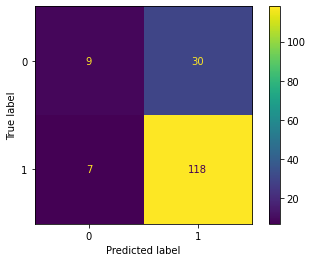

In [ ]:
plot_confusion_matrix(model, X_test_fs, y_test)
plt.show()

Feature: 0, Score: 0.00959
Feature: 1, Score: 0.04263
Feature: 2, Score: 0.00407
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02696
Feature: 5, Score: 0.02180
Feature: 6, Score: 0.01707
Feature: 7, Score: 0.02056
Feature: 8, Score: 0.01864
Feature: 9, Score: 0.01357
Feature: 10, Score: 0.00343
Feature: 11, Score: 0.00417
Feature: 12, Score: 0.00361
Feature: 13, Score: 0.00358
Feature: 14, Score: 0.00416
Feature: 15, Score: 0.00238
Feature: 16, Score: 0.00336
Feature: 17, Score: 0.00277
Feature: 18, Score: 0.00363
Feature: 19, Score: 0.00617
Feature: 20, Score: 0.00363
Feature: 21, Score: 0.00332
Feature: 22, Score: 0.00168
Feature: 23, Score: 0.00301
Feature: 24, Score: 0.00494
Feature: 25, Score: 0.00639
Feature: 26, Score: 0.00531
Feature: 27, Score: 0.00451
Feature: 28, Score: 0.00440
Feature: 29, Score: 0.03451
Feature: 30, Score: 0.01196
Feature: 31, Score: 0.00070
Feature: 32, Score: 0.01291
Feature: 33, Score: 0.01781
Feature: 34, Score: 0.00079
Feature: 35, Score: 0.00767
Fe

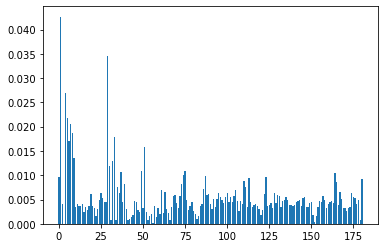

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Use the KNN classifier to fit data:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_fs, y_train) 

# Predict y data with classifier: 
y_predict = KNN.predict(X_test_fs)

KNN.score(X_test_fs, y_test)

print(' training score: {}'.format(KNN.score(X_train_fs, y_train)))
print(' testing score: {}'.format(KNN.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of KNN is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.9345971563981043
 testing score: 0.7012195121951219
Accuracy Score of KNN is : 0.7012195121951219
Confusion Matrix : 
[[16 23]
 [26 99]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.38      0.41      0.40        39
           1       0.81      0.79      0.80       125

    accuracy                           0.70       164
   macro avg       0.60      0.60      0.60       164
weighted avg       0.71      0.70      0.70       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


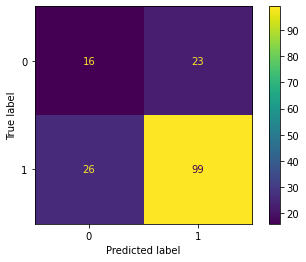

In [ ]:
plot_confusion_matrix(KNN, X_test_fs, y_test)
plt.show()

Feature: 0, Score: 0.00959
Feature: 1, Score: 0.04263
Feature: 2, Score: 0.00407
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02696
Feature: 5, Score: 0.02180
Feature: 6, Score: 0.01707
Feature: 7, Score: 0.02056
Feature: 8, Score: 0.01864
Feature: 9, Score: 0.01357
Feature: 10, Score: 0.00343
Feature: 11, Score: 0.00417
Feature: 12, Score: 0.00361
Feature: 13, Score: 0.00358
Feature: 14, Score: 0.00416
Feature: 15, Score: 0.00238
Feature: 16, Score: 0.00336
Feature: 17, Score: 0.00277
Feature: 18, Score: 0.00363
Feature: 19, Score: 0.00617
Feature: 20, Score: 0.00363
Feature: 21, Score: 0.00332
Feature: 22, Score: 0.00168
Feature: 23, Score: 0.00301
Feature: 24, Score: 0.00494
Feature: 25, Score: 0.00639
Feature: 26, Score: 0.00531
Feature: 27, Score: 0.00451
Feature: 28, Score: 0.00440
Feature: 29, Score: 0.03451
Feature: 30, Score: 0.01196
Feature: 31, Score: 0.00070
Feature: 32, Score: 0.01291
Feature: 33, Score: 0.01781
Feature: 34, Score: 0.00079
Feature: 35, Score: 0.00767
Fe

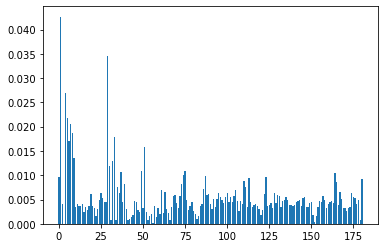

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

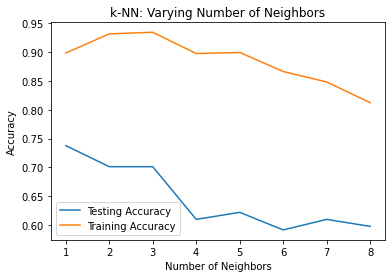

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_fs, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_fs, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_fs, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#
# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=50,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train_fs, y_train)

y_predict = bgclassifier.predict(X_test_fs)
#
# Model scores on test and training data
#
bgclassifier.score(X_test_fs, y_test)

print(' training score: {}'.format(bgclassifier.score(X_train_fs, y_train)))
print(' testing score: {}'.format(bgclassifier.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of bgclassifier is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.6
 testing score: 0.7621951219512195
Accuracy Score of bgclassifier is : 0.7621951219512195
Confusion Matrix : 
[[  3  36]
 [  3 122]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        39
           1       0.77      0.98      0.86       125

    accuracy                           0.76       164
   macro avg       0.64      0.53      0.50       164
weighted avg       0.71      0.76      0.69       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


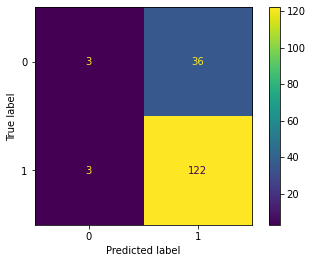

In [ ]:
plot_confusion_matrix(bgclassifier, X_test_fs, y_test)
plt.show()

In [ ]:
# Use the model classifier to fit data:
model = GradientBoostingClassifier(loss='deviance', #deviance or explonential
                               criterion='mse', #{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=1000 # how many trees to build
                              )
clf = model.fit(X_train_fs, y_train)

# Predict y data with classifier: 
y_predict = model.predict(X_test_fs)

model.score(X_test_fs, y_test)

print(' training score: {}'.format(model.score(X_train_fs, y_train)))
print(' testing score: {}'.format(model.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/

 training score: 0.6
 testing score: 0.7621951219512195
Accuracy Score of Random Forest is : 0.7621951219512195
Confusion Matrix : 
[[  0  39]
 [  0 125]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.76      1.00      0.87       125

    accuracy                           0.76       164
   macro avg       0.38      0.50      0.43       164
weighted avg       0.58      0.76      0.66       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/jupyterhub/anaconda/lib

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


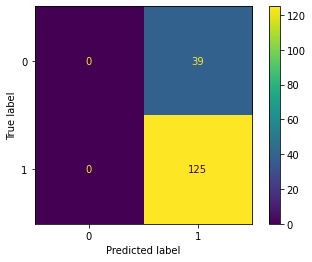

In [ ]:
plot_confusion_matrix(model, X_test_fs, y_test)
plt.show()